In [1]:
#Soru1

import tensorflow as tf
from tensorflow.keras import models, layers
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [3]:
dataset_path = "C:\Bananat"
dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_path)
#dataset = tf.keras.preprocessing.image_dataset_from_directory("C:/Users/Pc/Desktop/Bananat")

Found 13478 files belonging to 4 classes.


In [4]:
labels = dataset.class_names
labels

['overripe', 'ripe', 'rotten', 'unripe']

In [5]:
img_size = (64, 64)

In [6]:
data = []
for label in labels:
    label_path = os.path.join(dataset_path, label)
    for img_file in os.listdir(label_path):           #Burada görüntü verilerini numpy dizilerine çeviriyor.
        img_path = os.path.join(label_path, img_file)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        data.append((img_array, label))

In [7]:
X = np.array([item[0] for item in data])                 #Burada giriş değer bilgilerini tutuyor.
y = np.array([labels.index(item[1]) for item in data])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,         #Data augmentation işlemi yapıldı. Overfitting'i önler.
    height_shift_range=0.2,
    horizontal_flip=True
)

In [13]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),    #Modelin performansını değerlendirir.
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


265/265 [==============================] - 36s 123ms/step - loss: 6.6223 - accuracy: 0.5417 - val_loss: 0.7035 - val_accuracy: 0.7331
Epoch 2/10
265/265 [==============================] - 33s 124ms/step - loss: 0.6880 - accuracy: 0.7276 - val_loss: 0.6008 - val_accuracy: 0.7744
Epoch 3/10
265/265 [==============================] - 31s 116ms/step - loss: 0.5302 - accuracy: 0.7963 - val_loss: 0.4521 - val_accuracy: 0.8591
Epoch 4/10
265/265 [==============================] - 33s 123ms/step - loss: 0.4399 - accuracy: 0.8325 - val_loss: 0.7162 - val_accuracy: 0.7807
Epoch 5/10
265/265 [==============================] - 32s 121ms/step - loss: 0.4060 - accuracy: 0.8516 - val_loss: 0.4374 - val_accuracy: 0.8358
Epoch 6/10
265/265 [==============================] - 33s 126ms/step - loss: 0.3632 - accuracy: 0.8653 - val_loss: 0.4058 - val_accuracy: 0.8369
Epoch 7/10
265/265 [==============================] - 33s 126ms/step - loss: 0.3578 - accuracy: 0.8658 - val_loss: 0.2720 - val_

In [14]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

127/127 [==============================] - 4s 26ms/step
Test Accuracy: 0.9033
Precision: 0.9061
Recall: 0.9033
F1 Score: 0.9032
Confusion Matrix:


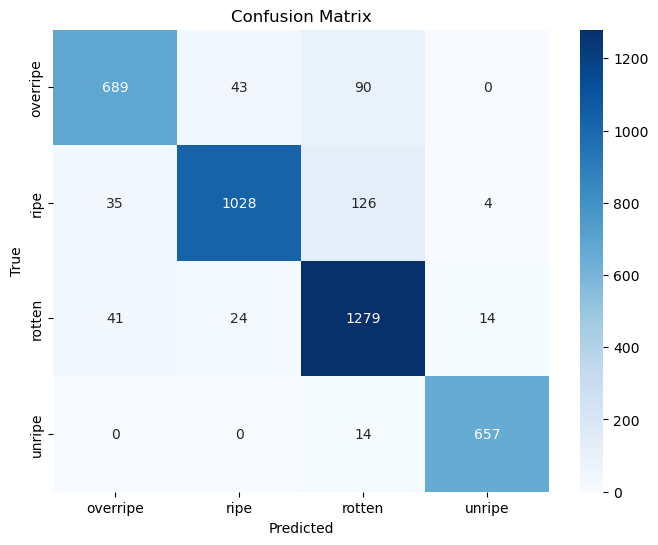

Classification Report:
              precision    recall  f1-score   support

    overripe       0.90      0.84      0.87       822
        ripe       0.94      0.86      0.90      1193
      rotten       0.85      0.94      0.89      1358
      unripe       0.97      0.98      0.98       671

    accuracy                           0.90      4044
   macro avg       0.92      0.91      0.91      4044
weighted avg       0.91      0.90      0.90      4044



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Modelin tahminlerini alın
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)
 

In [ ]:
#Soru2

In [16]:
from tensorflow.keras.applications import VGG16     # CNN mimarilerinden biridir.Transfer learning işlemini gerçekleştirir.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [17]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [18]:
for layer in base_model.layers:
    layer.trainable = False

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [21]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
265/265 [==============================] - 222s 824ms/step - loss: 2.0108 - accuracy: 0.7555 - val_loss: 0.5665 - val_accuracy: 0.8167
Epoch 2/10
265/265 [==============================] - 144s 543ms/step - loss: 0.4455 - accuracy: 0.8488 - val_loss: 0.3959 - val_accuracy: 0.8581
Epoch 3/10
265/265 [==============================] - 111s 418ms/step - loss: 0.3673 - accuracy: 0.8702 - val_loss: 0.4333 - val_accuracy: 0.8697
Epoch 4/10
265/265 [==============================] - 107s 403ms/step - loss: 0.3177 - accuracy: 0.8866 - val_loss: 0.2981 - val_accuracy: 0.8951
Epoch 5/10
265/265 [==============================] - 108s 406ms/step - loss: 0.2849 - accuracy: 0.8980 - val_loss: 0.2907 - val_accuracy: 0.9047
Epoch 6/10
265/265 [==============================] - 177s 669ms/step - loss: 0.2850 - accuracy: 0.9035 - val_loss: 0.2770 - val_accuracy: 0.9047
Epoch 7/10
265/265 [==============================] - 123s 465ms/step - loss: 0.2545 - accuracy: 0.9082 - val_loss: 0.2699 -

In [22]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

127/127 [==============================] - 116s 894ms/step
Test Accuracy: 0.9120
Precision: 0.9140
Recall: 0.9120
F1 Score: 0.9116
Confusion Matrix:


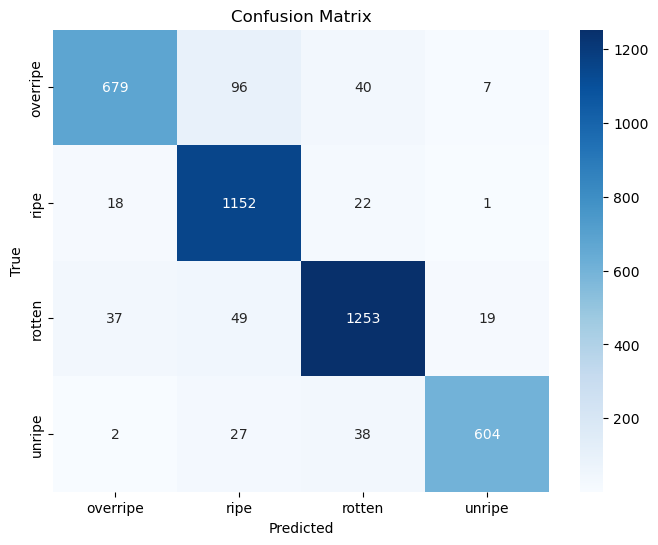

Classification Report:
              precision    recall  f1-score   support

    overripe       0.92      0.83      0.87       822
        ripe       0.87      0.97      0.92      1193
      rotten       0.93      0.92      0.92      1358
      unripe       0.96      0.90      0.93       671

    accuracy                           0.91      4044
   macro avg       0.92      0.90      0.91      4044
weighted avg       0.91      0.91      0.91      4044



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Modelin tahminlerini alın
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)

In [ ]:
#Soru3

In [24]:
from keras.applications.efficientnet import EfficientNetB0  #CNN mimarilerinden biridir.Modelin performansını,verimliliğini artırır.

my_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [25]:
from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential()
model.add(my_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=4)
y_val_encoded = to_categorical(y_val, num_classes=4)

In [28]:
history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val_encoded))

Epoch 1/10


265/265 [==============================] - 322s 419ms/step - loss: 0.3340 - accuracy: 0.8852 - val_loss: 0.5030 - val_accuracy: 0.8739
Epoch 2/10
265/265 [==============================] - 95s 357ms/step - loss: 0.1807 - accuracy: 0.9389 - val_loss: 0.1170 - val_accuracy: 0.9650
Epoch 3/10
265/265 [==============================] - 96s 360ms/step - loss: 0.1498 - accuracy: 0.9523 - val_loss: 0.1542 - val_accuracy: 0.9513
Epoch 4/10
265/265 [==============================] - 94s 355ms/step - loss: 0.1186 - accuracy: 0.9577 - val_loss: 0.2455 - val_accuracy: 0.9153
Epoch 5/10
265/265 [==============================] - 90s 340ms/step - loss: 0.1254 - accuracy: 0.9603 - val_loss: 0.0963 - val_accuracy: 0.9640
Epoch 6/10
265/265 [==============================] - 85s 320ms/step - loss: 0.1013 - accuracy: 0.9644 - val_loss: 0.1573 - val_accuracy: 0.9587
Epoch 7/10
265/265 [==============================] - 109s 411ms/step - loss: 0.1129 - accuracy: 0.9594 - val_loss: 0.0646 - val_accuracy: 0

In [29]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

127/127 [==============================] - 10s 63ms/step
Test Accuracy: 0.9797
Precision: 0.9798
Recall: 0.9797
F1 Score: 0.9797
Confusion Matrix:


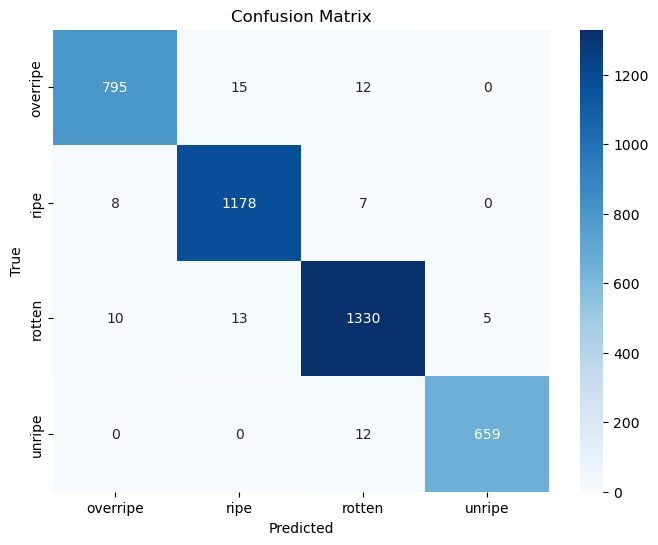

Classification Report:
              precision    recall  f1-score   support

    overripe       0.98      0.97      0.97       822
        ripe       0.98      0.99      0.98      1193
      rotten       0.98      0.98      0.98      1358
      unripe       0.99      0.98      0.99       671

    accuracy                           0.98      4044
   macro avg       0.98      0.98      0.98      4044
weighted avg       0.98      0.98      0.98      4044



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Modelin tahminlerini alın
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Karmaşıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report:')
print(class_report)